In [1]:
%pylab inline
from astropy.io import fits
import glob
import pandas as pd
from scipy.interpolate import interp1d
from nirspec import divspec, gluespec  #Find this code here: https://github.com/csalyk/nirspec
import pdb as pdb

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'nirspec'

First step: Look at google sheet and identify sets of adjacent dates on which source was observed.  Each set of dates will have its own reduction.

https://docs.google.com/spreadsheets/d/132AukRxC_ed6i_5SCwBAB5wLHYxvxrCHrTXb4KEQdjs/edit#gid=53493886

For this set of dates, use the code below to investigate each date. 

-First see if source was observed on that date

-Then, identify the best standard-star observations for the source.  These observations should be of a standard star (usually beginning with "HR"), be in the same setting as the source, be on the same night as the source, and be at a close airmass to the source (or the closest you can find).

-Once you've identified the best standard-star observations for the source, add the file names to the Time_domain_log google sheet.  *One important note:*  The files "ABAUR_20101213_1156_spec1d1.fits" and "ABAUR_20101213_1156_spec1d2.fits" represent the same grating setting, but different spectral orders (different wavelengths).  Therefore, the standard star files must have the same ending to match (i.e., d1.fits or d2.fits, as needed).

## 20110620

In [2]:
#Print filenames, if helpful
datadir='./data/'
filelist=glob.glob(datadir+'*20110620*.fits')
for i,file in enumerate(filelist):
    filename=(file.split('/'))[-1]
    hdulist=fits.open(file)
#    print(filename,hdulist[0].header['AIRMASS'],hdulist[0].header['FILNAME'],hdulist[0].header['WAVA_POS'])

Now, for each source input file, run divspec with the appropriate source and standard files. Comment out the codes for other files, so you only look at one reduction at a time.

For each pair of files, you'll need to adjust "dtau" (which accounts for differences in the atmospheric optical depth) and "dpix" (which accounts for small offsets in wavelength between source and standard).  You will also need to choose the right mode for the wavelength observed.

'M1' = 4.711393
'M3' = 5.023287

'M0' = 4.646994
'M2' = 4.954114

How do you choose the right dtau and dpix?  Try small shifts to see visually whether the make the final divided spectrum less noisy.  Also, look at the signal-to-noise ratio (SNR) values.  The green dashed vertica lines show where the SNR's are being measured.

In [10]:
#20110620
srcfile='DoAr44_20110620_0839_spec1d1.fits'
stdfile='HR7178_20110620_1422_spec1d1.fits'
#out=divspec(datadir, srcfile, stdfile, dtau=0.04, dpix=-0.4, mode='M1')

#Repeat these lines of code for each pair of source/standard data

## 20120512, 20120513 (combine these dates together)

In [3]:
#Print filenames, if helpful
datadir='/Users/csalyk/Dropbox/NIRSPEC_timedomain/data/'
filelist=glob.glob(datadir+'*20120512*.fits')
for i,file in enumerate(filelist):
    filename=(file.split('/'))[-1]
    hdulist=fits.open(file)
#    print(filename,hdulist[0].header['AIRMASS'],hdulist[0].header['FILNAME'],hdulist[0].header['WAVA_POS'])

In [5]:
#20120512
srcfile=''
stdfile=''
#out=divspec(datadir, srcfile, stdfile, dtau=-0.05, dpix=-0.2,mode='M1')

#Repeat these lines of code for all source/standard pairs

#20120513


## 20120702

In [6]:
#Print filenames, if helpful
datadir='/Users/csalyk/Dropbox/NIRSPEC_timedomain/data/'
filelist=glob.glob(datadir+'*20120702*.fits')
for i,file in enumerate(filelist):
    filename=(file.split('/'))[-1]
    hdulist=fits.open(file)
#    print(filename,hdulist[0].header['AIRMASS'],hdulist[0].header['FILNAME'],hdulist[0].header['WAVA_POS'])

In [16]:
#20120702
srcfile=''
stdfile=''
#out=divspec(datadir, srcfile, stdfile, dtau=0.0, dpix=0.,mode='M0')

#Repeat these lines of code for all source/standard pairs

## 20130624, 20130627, 20130628 (combine these dates together)

In [9]:
#Print filenames, if helpful
datadir='/Users/csalyk/Dropbox/NIRSPEC_timedomain/data/'
filelist=glob.glob(datadir+'*20130624*.fits')
for i,file in enumerate(filelist):
    filename=(file.split('/'))[-1]
    hdulist=fits.open(file)
#    print(filename,hdulist[0].header['AIRMASS'],hdulist[0].header['FILNAME'],hdulist[0].header['WAVA_POS'])

In [10]:
#20130624
srcfile=''
stdfile=''
#out=divspec(datadir, srcfile, stdfile, dtau=0.0, dpix=0.,mode='M0')

#Repeat these lines of code for all source/standard pairs

#20130627

#20130628


## Combine spectra together

At this point, we want to combine the data from each small set of dates together.  Collect all of the output files below.

In [11]:
doar44_20110620_files=['',''] #Add all "div" files here

doar44_20120512_files=['',''] #Add all "div" files here

doar44_20120702_files=['',''] #Add all "div" files here

doar44_20130624_files=['',''] #Add all "div" files here

Now use gluespec to combine them.

In [13]:
(wave,div)=gluespec('/Users/csalyk/Dropbox/NIRSPEC_timedomain/divdata/',doar44_20110620_files)
(wave,div)=gluespec('/Users/csalyk/Dropbox/NIRSPEC_timedomain/divdata/',doar44_20120512_files)
(wave,div)=gluespec('/Users/csalyk/Dropbox/NIRSPEC_timedomain/divdata/',doar44_20120702_files)
(wave,div)=gluespec('/Users/csalyk/Dropbox/NIRSPEC_timedomain/divdata/',doar44_20130624_files)

At this point, we can inspect the glued datasets.

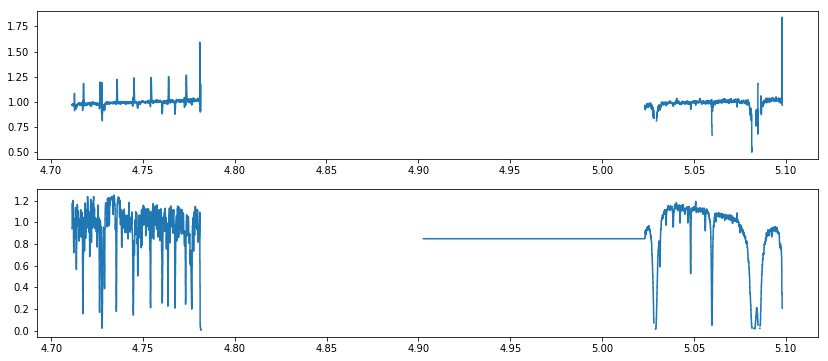

In [6]:
hdulist=fits.open('/Users/csalyk/Dropbox/NIRSPEC_timedomain/gluedata/DoAr44_20110620_glue.fits')
data=hdulist[1].data
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

ax1.plot(data['wave'],data['div'],linestyle='steps-mid')
ax2.plot(data['wave'],data['std'],linestyle='steps-mid')

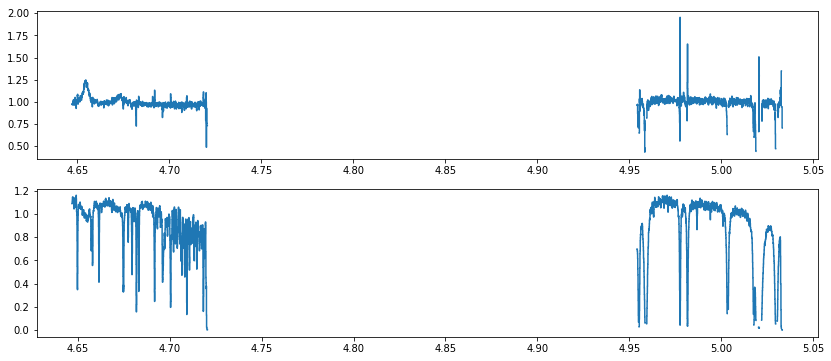

In [15]:
hdulist=fits.open('/Users/csalyk/Dropbox/NIRSPEC_timedomain/gluedata/DoAr44_20120512_glue.fits')
data=hdulist[1].data
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

ax1.plot(data['wave'],data['div'],linestyle='steps-mid')
ax2.plot(data['wave'],data['std'],linestyle='steps-mid')

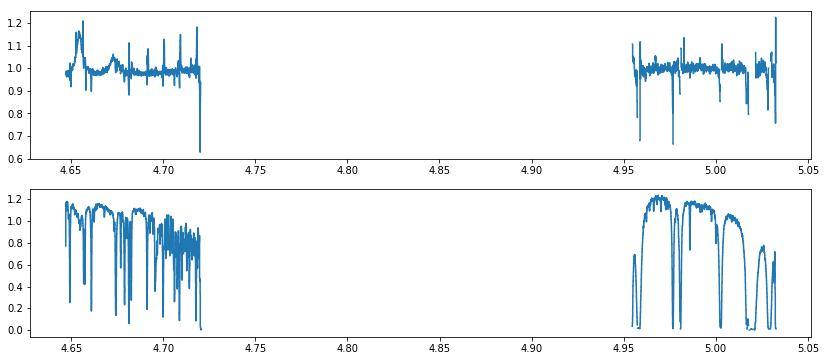

In [14]:
hdulist=fits.open('/Users/csalyk/Dropbox/NIRSPEC_timedomain/gluedata/DoAr44_20120702_glue.fits')
data=hdulist[1].data
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

ax1.plot(data['wave'],data['div'],linestyle='steps-mid')
ax2.plot(data['wave'],data['std'],linestyle='steps-mid')

In [ ]:
hdulist=fits.open('/Users/csalyk/Dropbox/NIRSPEC_timedomain/gluedata/DoAr44_20130624_glue.fits')
data=hdulist[1].data
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

ax1.plot(data['wave'],data['div'],linestyle='steps-mid')
ax2.plot(data['wave'],data['std'],linestyle='steps-mid')